In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Setting the display precision for floating-point numbers to 2 decimal places
pd.set_option("display.precision", 2)

#Change the default display settings for rows and columns number
pd.set_option("display.max_rows", 400) 
pd.set_option("display.max_columns", 50)

#Retina displays have a much higher pixel density compared to standard displays:
%config InlineBackend.figure_format = "retina"

In [4]:
goals_df = pd.read_csv("dataset/goals.csv")


In [5]:
goals_df.columns


Index(['serial', 'player_name', 'club', 'position', 'goals', 'right_foot',
       'left_foot', 'headers', 'others', 'inside_area', 'outside_areas',
       'penalties', 'match_played'],
      dtype='object')

In [6]:
goals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [7]:
# check if any null values is present or not
goals_df.isnull().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [8]:
goals_df.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.00,183.00,183.00,183.00,183.00,183.00,183.00,183.00,183.00,183.00
mean,55.02,2.02,0.97,0.69,0.33,0.02,1.81,0.21,0.20,6.84
std,24.17,2.01,1.40,1.14,0.61,0.15,1.92,0.51,0.55,2.57
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,43.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,5.00
50%,73.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,6.00
75%,73.00,2.00,1.00,1.00,1.00,0.00,2.00,0.00,0.00,8.00
max,73.00,15.00,11.00,8.00,3.00,1.00,13.00,3.00,3.00,13.00


In [9]:
# Top 10 most high goal scoring players

top_scorers = goals_df.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(10).reset_index()
top_scorers


,player_name,goals
0,Benzema,15
1,Lewandowski,13
2,Haller,11
3,Salah,8
4,Mahrez,7
5,Nkunku,7
6,Danjuma,6
7,Núñez,6
8,Ronaldo,6
9,Mbappé,6


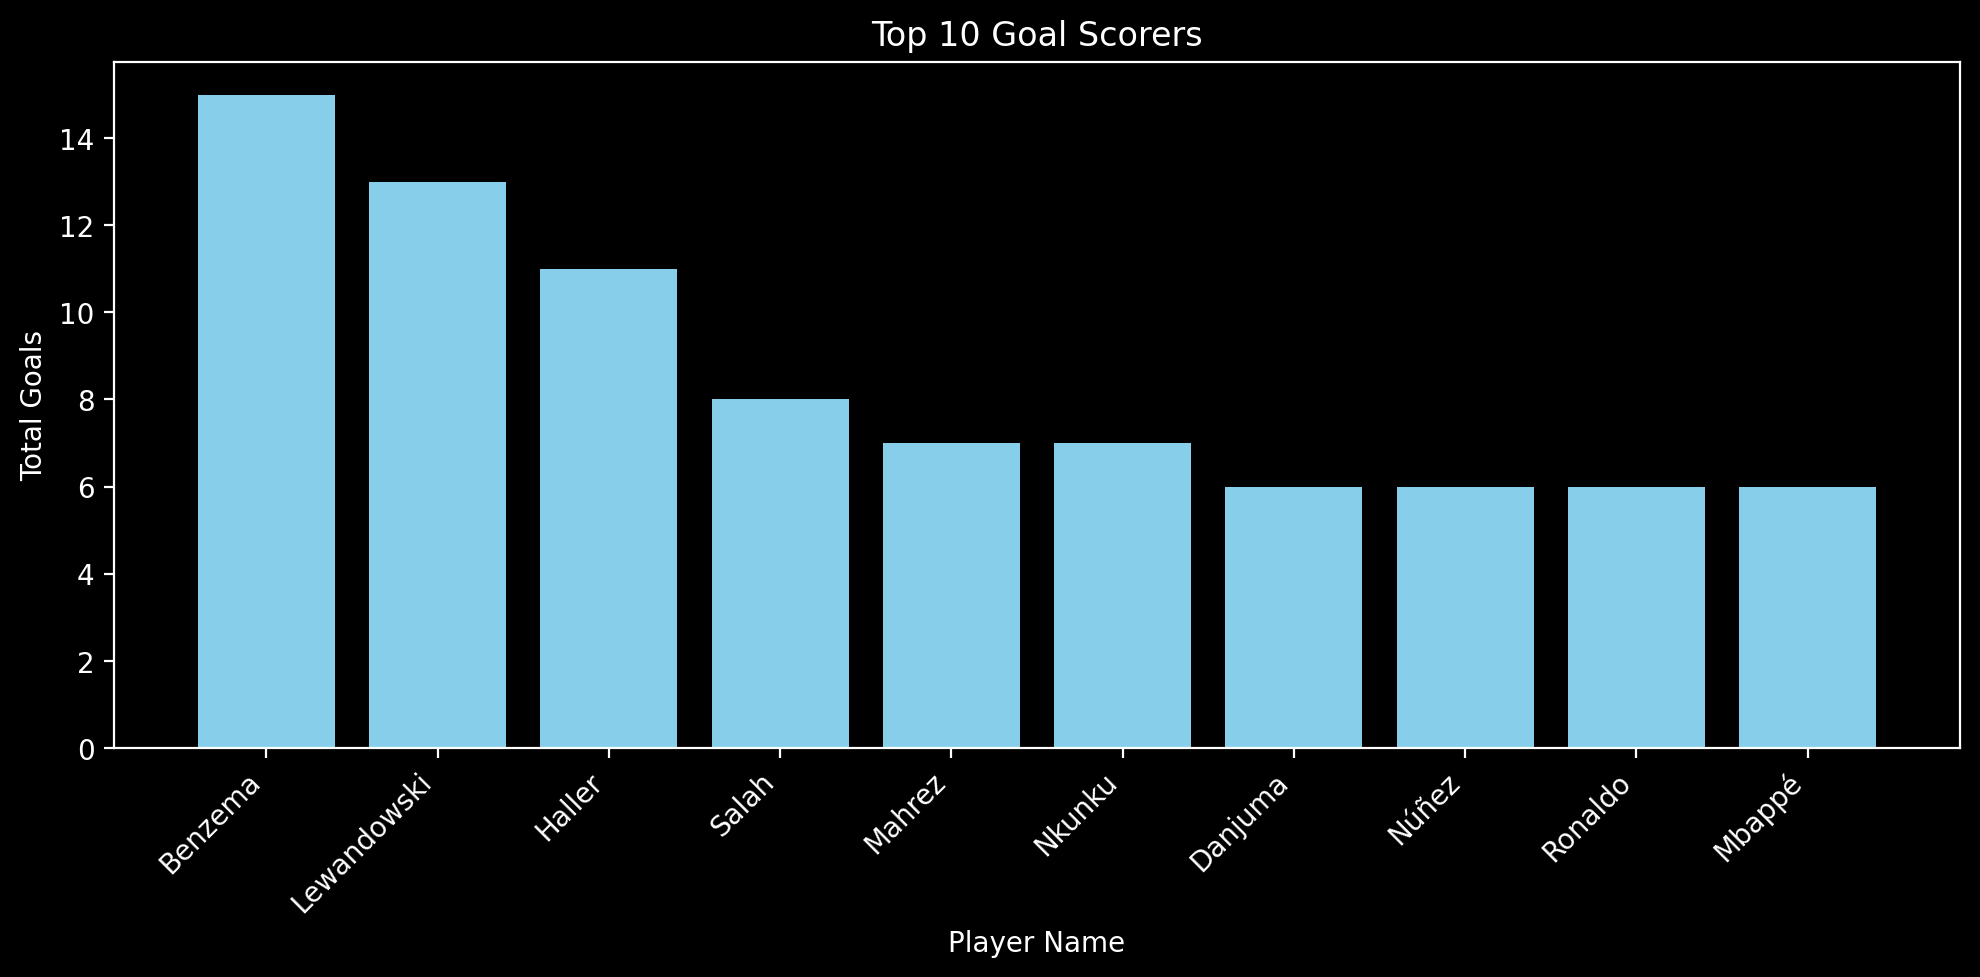

In [10]:

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(top_scorers['player_name'], top_scorers['goals'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Goals')
plt.title('Top 10 Goal Scorers')
plt.xticks(rotation=45, ha='right')  # Rotate player names for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [11]:
club_goals = goals_df.groupby("club")['goals'].sum().sort_values(ascending=False).head(10).reset_index()
club_goals.columns = ['club', 'goals']



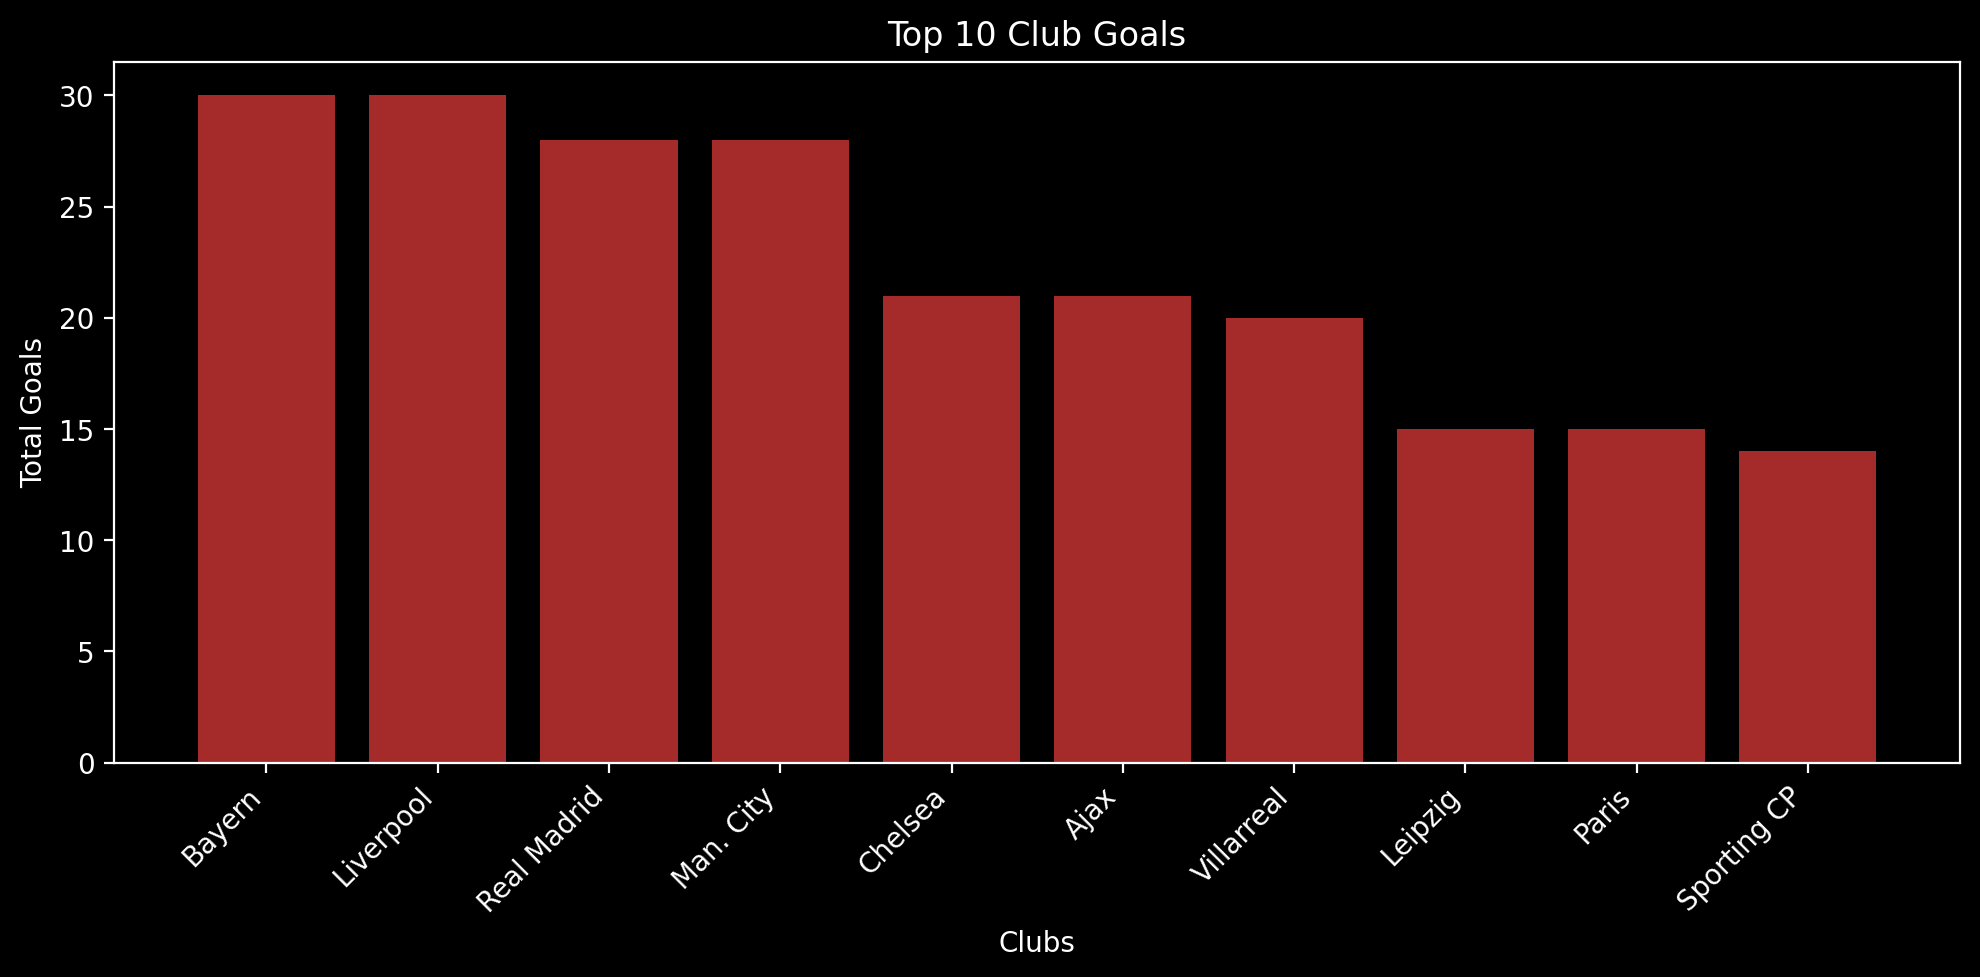

In [12]:
# Plotting for most goals by club

plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(club_goals['club'], club_goals['goals'], color='brown')
plt.xlabel('Clubs')
plt.ylabel('Total Goals')
plt.title('Top 10 Club Goals')
plt.xticks(rotation=45, ha='right')  # Rotate player names for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [13]:
# corr_matrix = goals_df[ ['goals', 'right_foot','left_foot', 'headers', 'inside_area', 'outside_areas','penalties', 'match_played']].corr()
# corr_matrix['goals'].sort_values(ascending=False)
# corr_matrix
# Group the data by position and calculate average goals
avg_goals_by_position = goals_df.groupby('position')['goals'].mean()

# Display the results
print("Average Goals by Position:")
print(avg_goals_by_position)



Average Goals by Position:
position
Defender      1.09
Forward       2.70
Midfielder    1.77
Name: goals, dtype: float64


##### Number of goals by position

In [14]:
# Group the data by position and calculate average goals
avg_goals_by_position = goals_df.groupby('position')['goals'].mean()

# Display the results
print("Average Goals by Position:")
print(avg_goals_by_position)




Average Goals by Position:
position
Defender      1.09
Forward       2.70
Midfielder    1.77
Name: goals, dtype: float64


/tmp/ipykernel_3740269/980759558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_goals_by_position.index, y=avg_goals_by_position.values, palette='viridis')


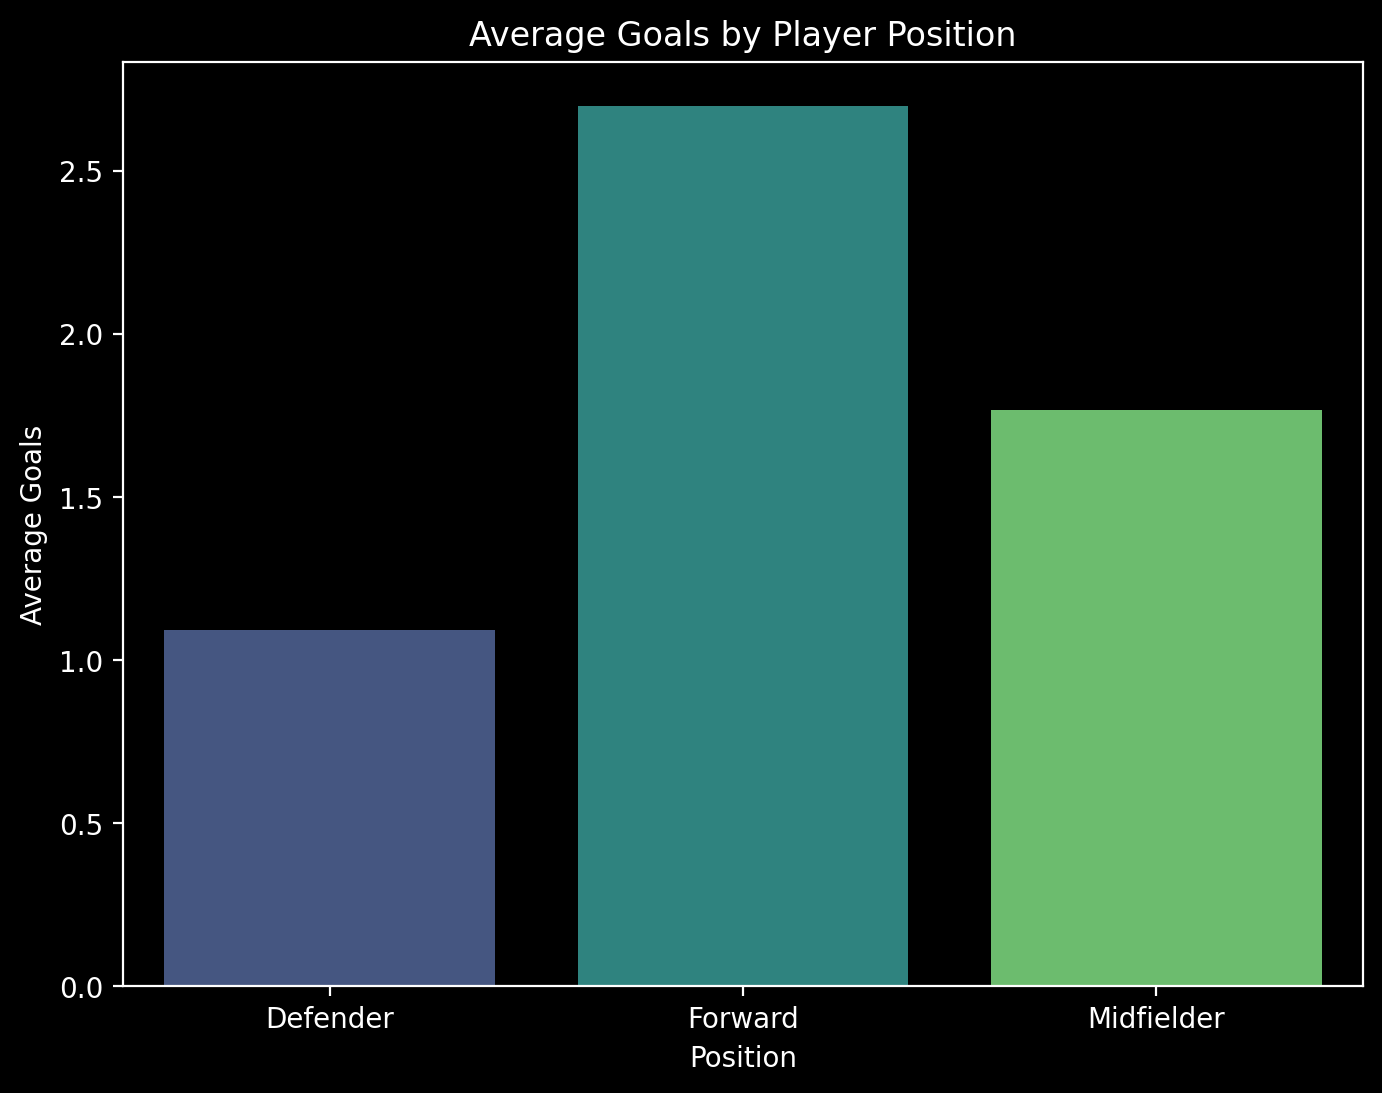

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart for average goals by position
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_goals_by_position.index, y=avg_goals_by_position.values, palette='viridis')
plt.title('Average Goals by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.show()


##### Most Completed Dribbles

In [25]:
attacking_df = pd.read_csv("dataset/attacking.csv")
completed_dribbles = attacking_df['dribbles'].max()
most_completed_dribbles = attacking_df[attacking_df['dribbles'] == completed_dribbles]
most_completed_dribbles.reset_index(drop=True, inplace=True)
most_completed_dribbles


,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13


##### Most Assist


In [28]:
assists_df = attacking_df['assists'].max()
most_assists = attacking_df[attacking_df['assists'] == assists_df]
most_assists.reset_index(inplace=True, drop=True)
most_assists


,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7


##### Most offside by club

In [36]:
club_offsides = attacking_df.groupby('club')['offsides'].sum().sort_values(ascending=False).head(1).reset_index()
club_offsides

,club,offsides
0,Man. City,33


##### Player who played the highest matches from each club